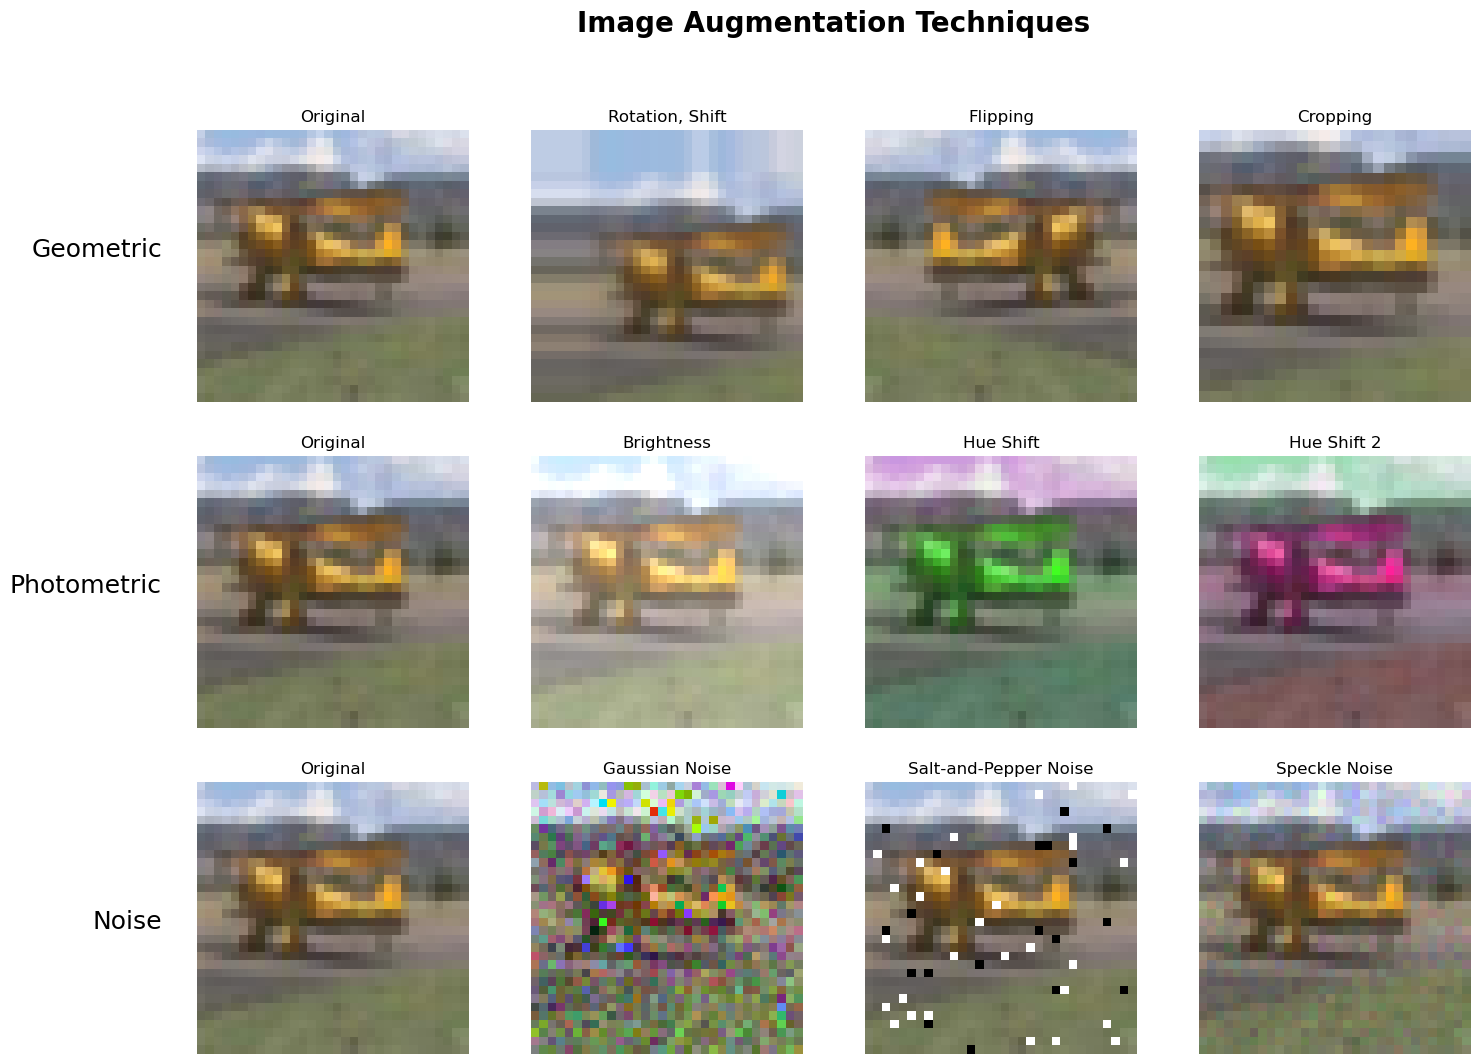

In [6]:
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.datasets import cifar10
import tensorflow as tf

# CIFAR-10-Datensatz laden
(x_train, _), (_, _) = cifar10.load_data()

# Zufälliges Bild aus dem Datensatz auswählen
random_index = np.random.randint(0, x_train.shape[0])
original_image = x_train[48257]

# Augmentierungen anwenden
augmented_images = []

# Geometrische Augmentierungen
def rotate_shift(image):
    image = tf.keras.preprocessing.image.random_rotation(image, 20, row_axis=0, col_axis=1, channel_axis=2)
    image = tf.keras.preprocessing.image.random_shift(image, 0.2, 0.2, row_axis=0, col_axis=1, channel_axis=2)
    return image.astype(np.uint8)

def flip(image):
    return tf.image.flip_left_right(image).numpy().astype(np.uint8)

def crop(image):
    h, w, _ = image.shape
    start_h = int(h * 0.1)
    start_w = int(w * 0.1)
    end_h = int(h * 0.9)
    end_w = int(w * 0.9)
    return image[start_h:end_h, start_w:end_w].astype(np.uint8)

augmented_images.append(rotate_shift(original_image.copy()))
augmented_images.append(flip(original_image.copy()))
augmented_images.append(crop(original_image.copy()))

# Photometrische Augmentierungen
def brightness(image):
    return tf.image.adjust_brightness(image, 0.2).numpy().astype(np.uint8)

def hue_shift(image):
    return tf.image.adjust_hue(image, 0.2).numpy().astype(np.uint8)

def hue_shift_2(image):
    return tf.image.adjust_hue(image, -0.2).numpy().astype(np.uint8)

augmented_images.append(brightness(original_image.copy()))
augmented_images.append(hue_shift(original_image.copy()))
augmented_images.append(hue_shift_2(original_image.copy()))

# Noise-Corruption Augmentierungen
def add_gaussian_noise(image, mean=0, std=25):
    noise = np.random.normal(mean, std, image.shape).astype(np.uint8)
    return np.clip(image + noise, 0, 255).astype(np.uint8)

def add_salt_pepper_noise(image, prob=0.05):
    noisy = image.copy()
    h, w, c = noisy.shape
    mask = np.random.choice((0, 1, 2), size=(h, w, 1), p=[1 - prob, prob / 2, prob / 2])
    mask = np.repeat(mask, c, axis=2)
    noisy[mask == 1] = 255
    noisy[mask == 2] = 0
    return noisy

def add_speckle_noise(image, prob = 0.05):
    noisy = image.copy()
    h, w, c = noisy.shape
    gauss = np.random.randn(h, w, c)
    gauss = gauss.reshape(h, w, c)
    noisy = noisy + noisy * gauss * prob
    noisy = np.clip(noisy, 0, 255).astype(np.uint8)
    return noisy

augmented_images.append(add_gaussian_noise(original_image.copy()))
augmented_images.append(add_salt_pepper_noise(original_image.copy()))
augmented_images.append(add_speckle_noise(original_image.copy()))

# Bilder visualisieren
fig, axes = plt.subplots(3, 4, figsize=(16, 12))

# Originalbild in jeder Zeile
for i in range(3):
    axes[i, 0].imshow(original_image)
    axes[i, 0].set_title("Original")
    axes[i, 0].axis("off")

# Geometrische Augmentierungen
axes[0, 1].imshow(augmented_images[0].astype(np.uint8))
axes[0, 1].set_title("Rotation, Shift")
axes[0, 1].axis("off")
axes[0, 2].imshow(augmented_images[1].astype(np.uint8))
axes[0, 2].set_title("Flipping")
axes[0, 2].axis("off")
axes[0, 3].imshow(augmented_images[2].astype(np.uint8))
axes[0, 3].set_title("Cropping")
axes[0, 3].axis("off")

# Photometrische Augmentierungen
axes[1, 1].imshow(augmented_images[3].astype(np.uint8))
axes[1, 1].set_title("Brightness")
axes[1, 1].axis("off")
axes[1, 2].imshow(augmented_images[4].astype(np.uint8))
axes[1, 2].set_title("Hue Shift")
axes[1, 2].axis("off")
axes[1, 3].imshow(augmented_images[5].astype(np.uint8))
axes[1, 3].set_title("Hue Shift 2")
axes[1, 3].axis("off")

# Noise-Corruption Augmentierungen
axes[2, 1].imshow(augmented_images[6].astype(np.uint8))
axes[2, 1].set_title("Gaussian Noise")
axes[2, 1].axis("off")
axes[2, 2].imshow(augmented_images[7].astype(np.uint8))
axes[2, 2].set_title("Salt-and-Pepper Noise")
axes[2, 2].axis("off")
axes[2, 3].imshow(augmented_images[8].astype(np.uint8))
axes[2, 3].set_title("Speckle Noise")
axes[2, 3].axis("off")

# Add clear row labels by using text instead of ylabel
# This positions the text to the left of the first column
plt.figtext(0.08, 0.78, "Geometric", fontsize=18, ha="right", va="center")
plt.figtext(0.08, 0.5, "Photometric", fontsize=18, ha="right", va="center")
plt.figtext(0.08, 0.22, "Noise", fontsize=18, ha="right", va="center")

fig.suptitle('Image Augmentation Techniques', fontsize=20, fontweight='bold', y=0.98)


# Add a bit more space on the left for the labels
plt.subplots_adjust(left=0.1)

plt.savefig('./traditional_image_augmentation_examples.png')
# plt.show()